In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv("Kenya_Schools.csv")
df.head(3)

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
0,VOO SPECIAL UNIT,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY & BOARDING,SPECIAL SCHOOL,19.0,19.0,6.3,...,0,EASTERN,KITUI,MUTHA,VOO,MUTITO,"(-1.66668, 38.32132)",-1.666680,38.321320,KITUI
1,MASAANTARE PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,44.3,53.2,88.7,...,1,RIFT VALLEY,NAROK,OLOLUNGA,NAROK SOUTH,OLOLUNGA,"(-1.012145, 35.648155)",-1.012145,35.648155,NAROK
2,NGOCHONI PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMET/DEB,MIXED,DAY ONLY,ORDINARY,37.6,32.9,131.5,...,0,NYANZA,KURIA,MABERA,BUGUMBE WEST,KURIA,"(-1.159798, 34.394076)",-1.159798,34.394076,MIGORI


In [95]:
''' Extract Nairobi dataset'''
df = df.loc[df['County']=='NAIROBI']
df.head(3)

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
21,RABAI ROAD PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,35.4,46.4,41.3,...,3,NAIROBI,NAIROBI,MAKADARA,MAKADARA,MAKADARA,"(-1.286176, 36.872801)",-1.286176,36.872801,NAIROBI
24,JOVIAL ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,0.0,0.0,0.0,...,0,NAIROBI,NAIROBI,EMBAKASI,UMOJA,EMBAKASI,"(-1.28058, 36.90975)",-1.280580,36.909750,NAIROBI
32,SALAMA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,48.7,66.9,76.5,...,7,NAIROBI,NAIROBI,STAREHE,HURUMA,STAREHE,"(-1.257462, 36.870696)",-1.257462,36.870696,NAIROBI


In [96]:
df = df[['Total Enrolment', 'Total Number of Classrooms', 'Pupil Teacher Ratio']]
df.head()

,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,743,16,35.4
24,0,0,0.0
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0


In [97]:
index = df[df['Total Enrolment'] == 0].index
df.drop(index, inplace=True)
df.head()

,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,743,16,35.4
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0
53,1207,24,44.7


In [98]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,1,743,16,35.4
32,1,1606,24,48.7
40,1,11,1,11.0
49,1,28,2,14.0
53,1,1207,24,44.7


In [99]:
''' Reset columns to use indexes'''
df.shape[1]
df.columns = range(df.shape[1])
df.head()

,0,1,2,3
21,1,743,16,35.4
32,1,1606,24,48.7
40,1,11,1,11.0
49,1,28,2,14.0
53,1,1207,24,44.7


In [101]:
x1 = df[1]
x2 = df[2]
y1 = df[3]

In [102]:
x1

21        743
32       1606
40         11
49         28
53       1207
         ... 
25915     991
25959     153
25966      39
25968     777
25977     739
Name: 1, Length: 1064, dtype: int64

In [103]:
x2

21       16
32       24
40        1
49        2
53       24
         ..
25915    26
25959     8
25966     4
25968    24
25977    16
Name: 2, Length: 1064, dtype: int64

In [104]:
y1

21       35.4
32       48.7
40       11.0
49       14.0
53       44.7
         ... 
25915    32.0
25959    17.0
25966     9.8
25968    32.4
25977    37.0
Name: 3, Length: 1064, dtype: float64

In [111]:
x11 = []
mean = np.mean(x1)
std = np.std(x1)
for c in x1:
    x11.append((c - mean) / std)

In [112]:
x1

21        743
32       1606
40         11
49         28
53       1207
         ... 
25915     991
25959     153
25966      39
25968     777
25977     739
Name: 1, Length: 1064, dtype: int64

In [113]:
x11

[1.0205885372685697,
 3.1050561943830672,
 -0.7474651417671345,
 -0.7064037858332451,
 2.1413220168759013,
 -0.5808043441531132,
 -0.14362167215111532,
 4.332066124642818,
 -0.3948205555113793,
 2.6050738015410038,
 -0.6725885515347481,
 -0.5035123800422627,
 1.3394178892258277,
 -0.7208960291040296,
 -0.6387733172362511,
 -0.43105116368834046,
 -0.7064037858332451,
 0.8732507306822609,
 -0.761957385037919,
 -0.4503741547160531,
 -0.7595420111594549,
 -0.7426343940102064,
 0.3974220766248378,
 1.1196188662855968,
 -0.5204199971915113,
 -0.7305575246178859,
 -0.4141435465390919,
 -0.4576202763514453,
 0.21143828798310393,
 0.18003842756307092,
 -0.6001273351808258,
 -0.5518198576115443,
 -0.670173177656284,
 0.08342347242450787,
 -0.3634206950913463,
 -0.6750039254132122,
 1.853892525338676,
 1.699308597116975,
 -0.43346653756680453,
 -0.09048344682490565,
 -0.5228353710699754,
 -0.27646723546663954,
 -0.7039884119547811,
 -0.7353882723748141,
 2.3538749181807397,
 -0.08323732518951342,

In [114]:
x12 = []
mean = np.mean(x2)
std = np.std(x2)
for c in x2:
    x12.append((c - mean) / std)

In [115]:
x2

21       16
32       24
40        1
49        2
53       24
         ..
25915    26
25959     8
25966     4
25968    24
25977    16
Name: 2, Length: 1064, dtype: int64

In [116]:
x12

[0.6832671819787034,
 1.6791524992736901,
 -1.1840177879493967,
 -1.0595321232875234,
 1.6791524992736901,
 -0.8105607939637767,
 -0.31261813531628335,
 2.675037816568677,
 -0.8105607939637767,
 5.662693768453637,
 -0.9350464586256501,
 -0.06364680599253665,
 1.6791524992736901,
 -1.0595321232875234,
 -0.6860751293019033,
 -0.31261813531628335,
 -1.0595321232875234,
 2.675037816568677,
 -0.8105607939637767,
 -0.31261813531628335,
 -1.1840177879493967,
 -1.0595321232875234,
 0.6832671819787034,
 0.8077528466405767,
 -0.31261813531628335,
 -0.56158946464003,
 -0.31261813531628335,
 0.18532452333121002,
 -0.31261813531628335,
 1.0567241759643233,
 -1.1840177879493967,
 -0.31261813531628335,
 -0.8105607939637767,
 0.30981018799308335,
 -0.6860751293019033,
 -1.30850345261127,
 1.6791524992736901,
 1.0567241759643233,
 -0.31261813531628335,
 -0.31261813531628335,
 -0.06364680599253665,
 -0.06364680599253665,
 -1.0595321232875234,
 -0.9350464586256501,
 1.4301811699499434,
 -0.31261813531628

In [117]:
len(x11)

1064

In [118]:
len(x11)

1064

In [119]:
len(y1)

1064

In [125]:
df = pd.DataFrame({"1": x11, "2":x12, "3":y1})
df.head()

,1,2,3
21,1.020589,0.683267,35.4
32,3.105056,1.679152,48.7
40,-0.747465,-1.184018,11.0
49,-0.706404,-1.059532,14.0
53,2.141322,1.679152,44.7


In [152]:
X = df[["1","2"]]
y = df[["3"]]

In [153]:
len(X)

1064

In [154]:
len(y)

1064

In [155]:
XTrain  = X[:851]
XTest =  X[851:]
yTrain  = y[:851]
yTest =  y[851:]

In [156]:
len(XTrain)

851

In [157]:
len(yTrain)

851

In [158]:
XTrain

,1,2
21,1.020589,0.683267
32,3.105056,1.679152
40,-0.747465,-1.184018
49,-0.706404,-1.059532
53,2.141322,1.679152
...,...,...
20991,-0.184683,0.683267
21011,-0.124299,-0.063647
21022,-0.484189,-0.312618
21056,-0.703988,-0.935046


In [159]:
theta = np.array([0]*len(XTrain.columns))
theta

array([0, 0])

In [160]:
m = len(XTrain)
m

851

In [161]:
def hypothesis(theta, X):
    return theta*X

In [162]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [163]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [164]:
J, j, theta = gradientDescent(XTrain, yTrain, theta, 0.001, 1000)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [149]:
y_hat = hypothesis(theta, XTrain)
y_hat = np.sum(y_hat, axis=1)
y_hat

21       0.0
32       0.0
40       0.0
49       0.0
53       0.0
        ... 
20991    0.0
21011    0.0
21022    0.0
21056    0.0
21096    0.0
Length: 851, dtype: float64

In [66]:
len(XTrain)

851

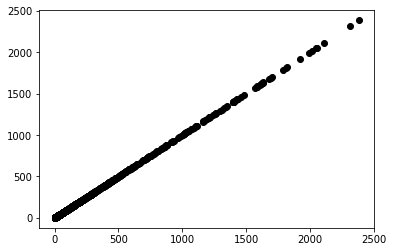

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
# plt.scatter(XTrain, yTrain, color='black')         
plt.scatter(XTrain, y_hat, color='red')
plt.show()

ValueError: x and y must be the same size

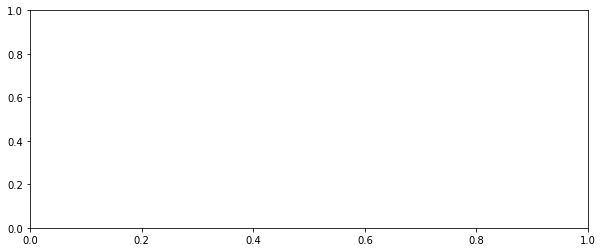

In [68]:
plt.figure(figsize=(10,4))
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

In [74]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


scaledX = scale.fit_transform(X)

print(scaledX)

[[ 0.          1.02058854  0.98103893]
 [ 0.          3.10505619  1.86647175]
 [ 0.         -0.74746514 -0.64336412]
 ...
 [ 0.         -0.67983467 -0.7232528 ]
 [ 0.          1.10271125  0.78131725]
 [ 0.          1.01092704  1.08755717]]


In [77]:
len(scaledX)

1064

In [78]:
len(y)

1064

ValueError: x and y must be the same size

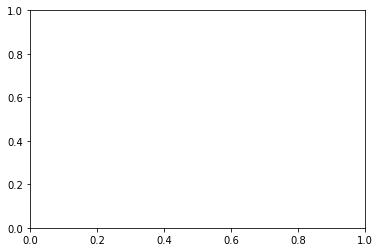

In [79]:
plt.scatter(scaledX, yTrain)